In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

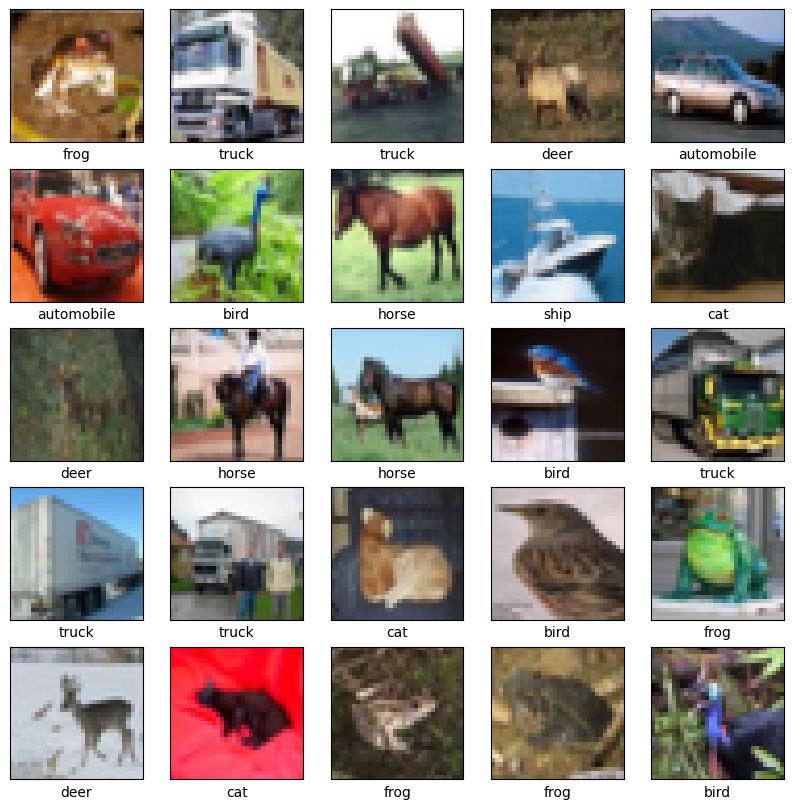

In [3]:
# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to plot sample images
def plot_sample_images(images, labels, class_names):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i][0]])
    plt.show()
# Plot sample images
plot_sample_images(train_images, train_labels, class_names)

In [4]:
# Build a simple CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 27s 16ms/step - loss: 1.5263 - accuracy: 0.4431 - val_loss: 1.3093 - val_accuracy: 0.5236
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1808 - accuracy: 0.5794 - val_loss: 1.1065 - val_accuracy: 0.6102
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0322 - accuracy: 0.6354 - val_loss: 1.0083 - val_accuracy: 0.6510
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9406 - accuracy: 0.6709 - val_loss: 0.9259 - val_accuracy: 0.6764
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8705 - accuracy: 0.6955 - val_loss: 0.9291 - val_accuracy: 0.6747
Epoch 6/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8164 - accuracy: 0.7123 - val_loss: 0.9247 - val_accuracy: 0.6770
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7687 - accuracy: 0.7318 - val_loss: 0.8695 -

In [6]:
model.save('cifar10_model.h5')

C:\Users\shiva\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 2s - loss: 0.8182 - accuracy: 0.7203 - 2s/epoch - 6ms/step
Test accuracy: 0.720300018787384


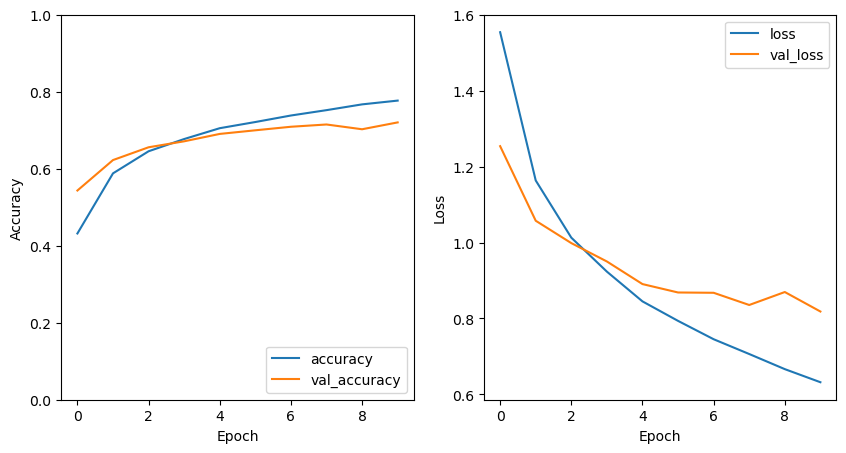

In [8]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

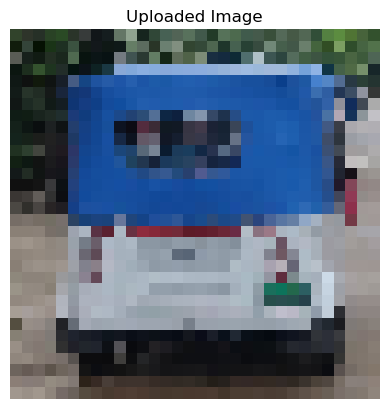

In [12]:
# Test on an image 

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_path = 'C:\\Users\\shiva\\Downloads\\auto_image.jpeg'  # Update with the path to your image
img = image.load_img(img_path, target_size=(32, 32))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Normalize the image
img_array = img_array / 255.0

# Add an extra dimension to match the input shape (batch_size, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)

# Show the image
plt.imshow(img)
plt.title('Uploaded Image')
plt.axis('off')
plt.show()


In [13]:
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(f'Predicted class: {class_names[predicted_class]}')

1/1 [==============================] - 0s 119ms/step
Predicted class: automobile
